# 维数灾难 

+ 很多物体在高维空间表现的十分不同
+ 训练集维度越高，过拟合的风险越大
+ 我们无法通过增大数据集的方法解决维数灾难

# 降维的主要方法

+ 投影
    + 解决分布在高纬度的低维模型
    + 但无法解决子空间扭曲和转动的数据集
+ 流形学习
    + 对训练实例所在的流形进行建模从而达到降维目的

# PCA
找到接近数据集分布的超平面，然后将所有的数据都投影到这个超平面

## 使用sklearn 

In [1]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #将数据降维至2维
X2D = pca.fit_transform(X)
# pca.components_.T[:,0] 
# 获取第一个主成分
# 获取方差解释率
# pca.explained_variance_ratio_

NameError: name '_2' is not defined

In [ ]:
#不降维  获取方差为95%的最小维数
pca = PCA()
pca.fit(X)
cunsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cunsum>=0.95)+1
# 设置n_components=d

In [ ]:
#上面的代码等同为：
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transformi(X)

## 增量 PCA

In [ ]:
#将数据集分批  只对一个批量使用IPCA算法
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist,n_batches):
    inc_pca.partial_fit(X_batch)
X_mnist_reduced=inc_pcac.transform(X_mnist)

## 随机PCA

In [ ]:
rnd_pca = PCA(n_components=254,svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_mnist)

## 核PCA

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2,kernel='rbf',gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

# LLE 

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10)
x_reduced=lle.fit_transform(X)

# 其他降维方法

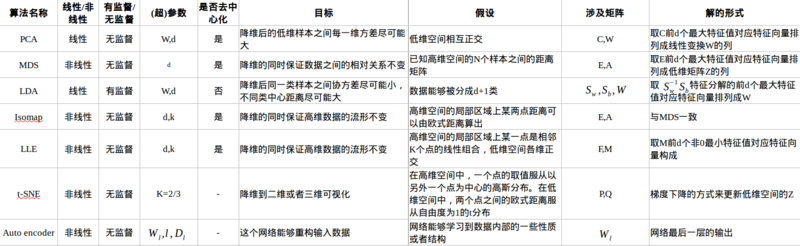